Exercice 2:  
Nous allons travailler sur la base de données glass. Il s’agit d’apprendre le type d’un verre 
(bâtiment, voiture, ...) en fonction de différentes caractéristiques chimiques. Ecrivez un 
modèle d’arbre de décision pour cette base de données. Analysez votre modèle en 
modifiant les hyper paramètres.

In [29]:
# Imports
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [30]:
# Chargement des données
glass = pandas.read_csv('glass.csv', delimiter=',')
glass.head()

,Id,refractive index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [32]:
# Séparation des colonnes en Apprentissage/Test
X = glass[glass.columns[:-1]].copy()
Y = glass["Type"].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.7, test_size=0.3, random_state=0)

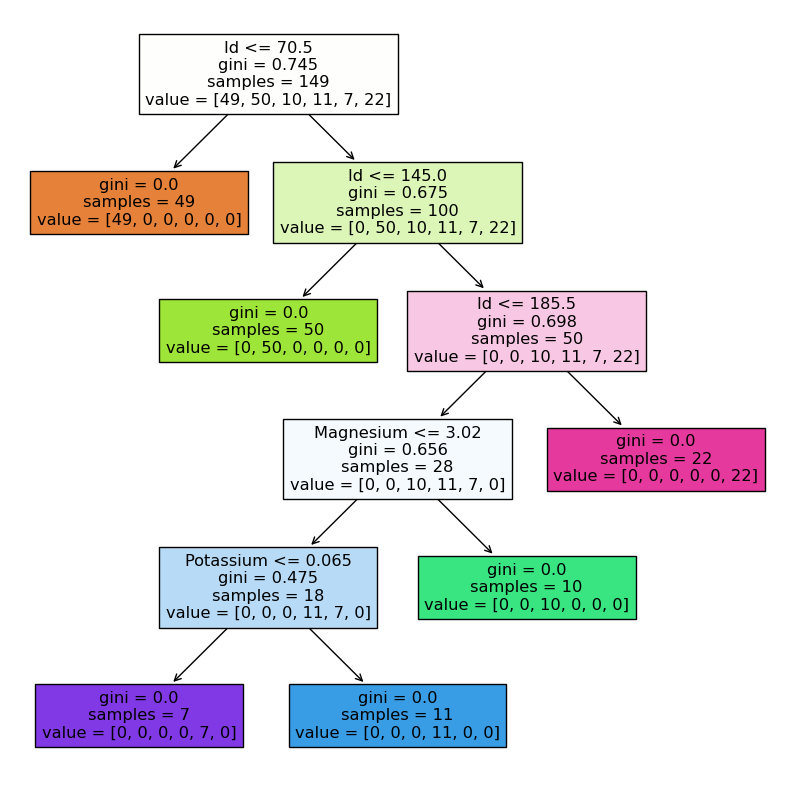

In [33]:
# Création de l'arbre
tree_para = {'criterion':['gini','entropy'],'max_depth':range(1,10),'min_samples_leaf':range(1,50)}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, Y_train)

# Visualisation de l'arbre
plt.figure(figsize=(10,10))
plot_tree(clf.best_estimator_,feature_names = X.columns,filled=True)
plt.show()

0.9846153846153847


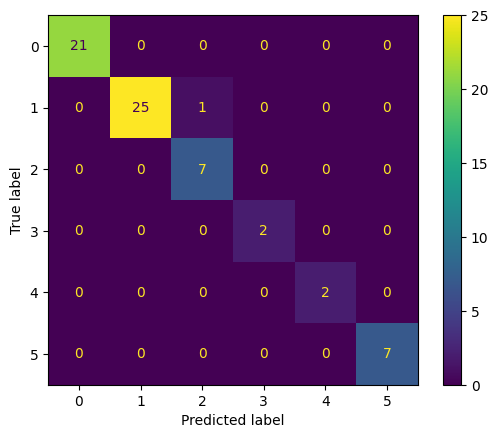

In [34]:
# Prediction avec l'arbre
Y_pred = clf.predict(X=X_test)
print(clf.score(X_test, Y_test))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Y_test,Y_pred)).plot()